## Compute the number of transactions by article_id and find optimal thresholds

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
from hmcollab import datasets
from hmcollab import articles
from hmcollab.directory_tree import HMDatasetDirectoryTree
from hmcollab import directories

## Full dataset

In [19]:
begin = datetime.now()
full_tree = HMDatasetDirectoryTree()
full = datasets.HMDataset(tree=full_tree, folds="threesets")
print('Seconds: ',(datetime.now() - begin).total_seconds())
print('Transactions shape: ', full.transactions.shape)
print('Articles with transactions: ', full.transactions.article_id.unique().shape[0])
print('Unique customers: ', full.transactions.customer_id.unique().shape)

Seconds:  79.843405
Transactions shape:  (31788324, 5)
Articles with transactions:  104547
Unique customers:  (1362281,)


In [5]:
print('Transactions by subset:')
print('Train_x:', full.train_x.shape) 
print('Train_y:', full.train_y.shape) 
print('Test_x:', full.test_x.shape) 
print('Test_y:', full.test_y.shape)
print('Val_x:', full.val_x.shape)
print('Val_y:', full.val_y.shape)

Transactions by subset:
Train_x: (18857057, 5)
Train_y: (147066, 5)
Test_x: (6313221, 5)
Test_y: (54065, 5)
Val_x: (6351682, 5)
Val_y: (49250, 5)


In [6]:
def frequencies(df, key):
    # Compute frequencies for a particular key
    # params: key: list
    # returns: filtered_article_id: DataFrame sorted descending by frequencies
    freqs_df = df.groupby(by=key, as_index=False).size()
    freqs_df.reset_index(inplace=True)
    freqs_df.drop(columns=['index'], inplace=True)
    freqs_df.rename(columns={'size':'frequencies'}, inplace=True)
    freqs_df.sort_values(by=['frequencies'], ascending=False, inplace=True)
    freqs_df.reset_index(inplace=True)
    return freqs_df

In [7]:
full_freqs_by_article_id = frequencies(full.transactions, key=['article_id'])
full_freqs_by_article_id.head()

,index,article_id,frequencies
0,53832,0706016001,50287
1,53833,0706016002,35043
2,1711,0372860001,31718
3,24808,0610776002,30199
4,70124,0759871002,26329


In [8]:
full_freqs_by_article_id.describe()   # 75% of the article_ids have less than 286 transactions

,index,frequencies
count,104547.000000,104547.000000
mean,52273.000000,304.057735
std,30180.263634,791.266060
min,0.000000,1.000000
25%,26136.500000,14.000000
50%,52273.000000,65.000000
75%,78409.500000,286.000000
max,104546.000000,50287.000000


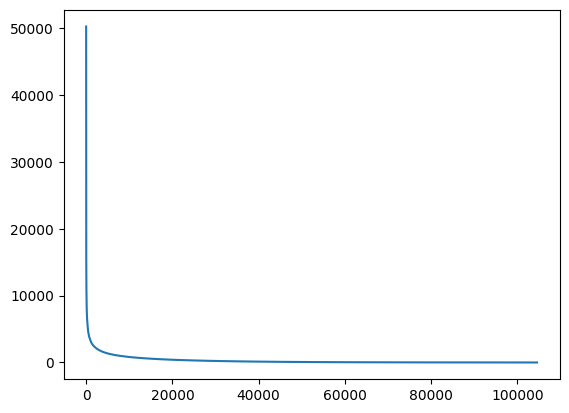

In [9]:
plt.plot(full_freqs_by_article_id.frequencies)

In [10]:
# 25,312 articles with more than 300 transactions
full_freqs_by_article_id.loc[full_freqs_by_article_id.frequencies>300].shape[0] 

25312

## Toy dataset

In [13]:
# toy = datasets.HMDataset(toy=True, folds='threesets') 
begin = datetime.now()
toy_tree = HMDatasetDirectoryTree(directories.data("toy"))
toy = datasets.HMDataset(tree=toy_tree, folds="threesets")
print('Seconds: ',(datetime.now() - begin).total_seconds())
print('Transactions shape: ', toy.transactions.shape)
print('Articles with transactions: ', toy.transactions.article_id.unique().shape[0])
print('Unique customers: ', toy.transactions.customer_id.unique().shape)

Seconds:  2.229048
Transactions shape:  (630673, 5)
Articles with transactions:  62991
Unique customers:  (10000,)


In [14]:
print('Transactions by subset:')
print('Train_x:', toy.train_x.shape) 
print('Train_y:', toy.train_y.shape) 
print('Test_x:', toy.test_x.shape) 
print('Test_y:', toy.test_y.shape)
print('Val_x:', toy.val_x.shape)
print('Val_y:', toy.val_y.shape)

Transactions by subset:
Train_x: (359027, 5)
Train_y: (19653, 5)
Test_x: (119609, 5)
Test_y: (6969, 5)
Val_x: (116650, 5)
Val_y: (6446, 5)


In [15]:
toy_freqs_by_article_id = frequencies(toy.transactions, key=['article_id'])
toy_freqs_by_article_id.head()

,index,article_id,frequencies
0,28009,0706016001,894
1,28010,0706016002,609
2,10941,0610776002,509
3,39169,0759871002,481
4,940,0372860001,465


In [16]:
toy_freqs_by_article_id.describe()   # 75% of the article_ids have less than 6 transactions

,index,frequencies
count,62991.00000,62991.000000
mean,31495.00000,10.012113
std,18184.07974,17.990400
min,0.00000,1.000000
25%,15747.50000,2.000000
50%,31495.00000,4.000000
75%,47242.50000,11.000000
max,62990.00000,894.000000


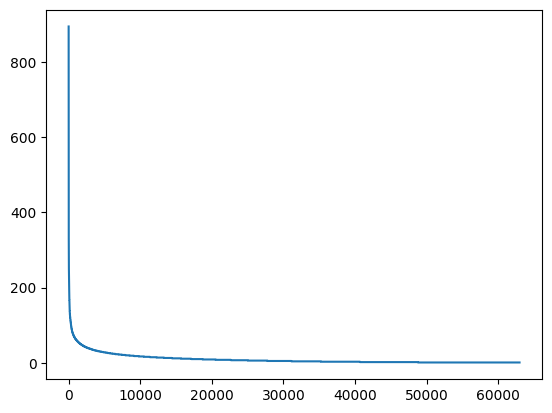

In [17]:
plt.plot(toy_freqs_by_article_id.frequencies)

In [18]:
# 252 articles with more than 50 transactions
toy_freqs_by_article_id.loc[toy_freqs_by_article_id.frequencies>50].shape[0] 

1626